In [165]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [166]:
'''
'load_breast_cancer()' contains a total of 30 features (input variables or attributes)
which are characteristics of the tumors - such as mean radius, mean texture etcetera.
we are loading all the features in a pandas DataFrame named df.
'''

df = pd.DataFrame(data=load_breast_cancer()['data'], columns = load_breast_cancer()['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [167]:
df.shape

(569, 30)

In [168]:
# this df will be the features set for our analysis to classify wether a new tumor would be Benign or Malignant.

X = df.copy()
Y = load_breast_cancer()['target'] # the target variable in the dataset.

In [169]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [170]:
# Define a function to remove outliers for a specific column
def outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Calculate the percentage of outliers for each column
outlier_percentage = X.apply(outliers).count() / len(df) * 100

outlier_percentage

mean radius                 2.460457
mean texture                1.230228
mean perimeter              2.284710
mean area                   4.393673
mean smoothness             1.054482
mean compactness            2.811951
mean concavity              3.163445
mean concave points         1.757469
mean symmetry               2.636204
mean fractal dimension      2.636204
radius error                6.678383
texture error               3.514938
perimeter error             6.678383
area error                 11.423550
smoothness error            5.272408
compactness error           4.920914
concavity error             3.866432
concave points error        3.339192
symmetry error              4.745167
fractal dimension error     4.920914
worst radius                2.987698
worst texture               0.878735
worst perimeter             2.636204
worst area                  6.151142
worst smoothness            1.230228
worst compactness           2.811951
worst concavity             2.108963
w

In [171]:
import numpy as np

# Apply log transformation to the features
X_log_transformed = np.log1p(X)
X_log_transformed.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,2.943913,2.431857,4.818667,6.909753,0.111899,0.244983,0.262441,0.137237,0.216642,0.075766,...,3.272606,2.908539,5.223594,7.610853,0.150315,0.510185,0.537604,0.235388,0.378505,0.112346
1,3.071303,2.932260,4.897093,7.190676,0.081340,0.075701,0.083330,0.067818,0.166531,0.055122,...,3.257712,3.194993,5.073923,7.579168,0.116716,0.171092,0.216401,0.170586,0.242946,0.085278
2,3.029650,3.102342,4.875197,7.093405,0.104000,0.148334,0.180153,0.120357,0.188055,0.058259,...,3.201526,3.278276,5.033701,7.444249,0.134880,0.353821,0.371839,0.217528,0.308440,0.083955
3,2.519308,3.062456,4.364117,5.958683,0.133219,0.249902,0.216240,0.100026,0.230874,0.092980,...,2.766948,3.314186,4.603869,6.343353,0.190455,0.623958,0.522893,0.229126,0.509104,0.159565
4,3.058237,2.730464,4.913390,7.168580,0.095583,0.124692,0.180653,0.099212,0.166277,0.057165,...,3.158701,2.871868,5.031744,7.362645,0.128745,0.186480,0.336472,0.150573,0.212204,0.073975


In [172]:
outlier_percentage = X_log_transformed.apply(outliers).count() / len(df) * 100

outlier_percentage

mean radius                1.230228
mean texture               0.351494
mean perimeter             1.054482
mean area                  0.878735
mean smoothness            1.054482
mean compactness           2.636204
mean concavity             2.460457
mean concave points        1.405975
mean symmetry              2.636204
mean fractal dimension     2.636204
radius error               5.448155
texture error              1.581722
perimeter error            2.284710
area error                 1.230228
smoothness error           5.096661
compactness error          4.569420
concavity error            3.866432
concave points error       3.163445
symmetry error             4.745167
fractal dimension error    4.920914
worst radius               0.702988
worst texture              0.351494
worst perimeter            0.351494
worst area                 0.351494
worst smoothness           0.878735
worst compactness          2.108963
worst concavity            0.878735
worst concave points       0

In [173]:
# scaling the feature set 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X_log_transformed))

In [174]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.138030,-2.658957,1.281628,1.130319,1.563449,3.150675,2.567947,2.487638,2.190236,2.251816,...,1.764045,-1.510820,2.022158,1.794344,1.305475,2.479386,2.003224,2.207318,2.682614,1.939736
1,1.711783,-0.267352,1.597721,1.713327,-0.827189,-0.481575,0.011104,0.571874,0.012967,-0.871539,...,1.706795,-0.270246,1.502321,1.737118,-0.368341,-0.411700,-0.077623,1.095013,-0.228740,0.292501
2,1.524183,0.545532,1.509470,1.511457,0.945465,1.076890,1.393265,2.021815,0.948160,-0.396907,...,1.490832,0.090437,1.362620,1.493444,0.536578,1.146233,0.929353,1.900749,1.177854,0.211979
3,-0.774335,0.354902,-0.550424,-0.843470,3.231311,3.256221,1.908415,1.460738,2.808556,4.856345,...,-0.179580,0.245955,-0.130272,-0.494860,3.305163,3.449402,1.907919,2.099822,5.487455,4.813255
4,1.652935,-1.231809,1.663405,1.667470,0.287017,0.569623,1.400416,1.438255,0.001931,-0.562573,...,1.326223,-1.669634,1.355825,1.346061,0.230922,-0.280508,0.700235,0.751489,-0.888983,-0.395358


In [175]:
outlier_percentage = X_scaled.apply(outliers).count() / len(df) * 100

outlier_percentage

0     1.230228
1     0.351494
2     1.054482
3     0.878735
4     1.054482
5     2.636204
6     2.460457
7     1.405975
8     2.636204
9     2.636204
10    5.448155
11    1.581722
12    2.284710
13    1.230228
14    5.096661
15    4.569420
16    3.866432
17    3.163445
18    4.745167
19    4.920914
20    0.702988
21    0.351494
22    0.351494
23    0.351494
24    0.878735
25    2.108963
26    0.878735
27    0.000000
28    3.514938
29    4.042179
dtype: float64

In [176]:
# Splitting the data into train and test set.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

In [177]:
X_train.shape

(398, 30)

In [178]:
# we will fit 3 classification algorithms here - Decision Tree, KNN and Naive Bayes.
# and then compare the performence of all three of them to judge which one fits better for this analysis.

In [179]:
# Let's start with Decision tree

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

# Training the Decision Tree model on the training data
dt_train = dt.fit(X_train, Y_train)

# Making predictions on the test data
Y_pred = dt.predict(X_test)

In [180]:
# checking the performance of our model
    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy*100)
print("Precision:",precision*100)
print("Recall:",recall*100)
print("F1-Score:",f1*100)

'''
Recall is more important here since the cost of False negative 
(Model predicting Benign when in reality the tumor is malignant) is very high in this case.

'''

Accuracy: 91.22807017543859
Precision: 96.96969696969697
Recall: 88.88888888888889
F1-Score: 92.7536231884058


'\nRecall is more important here since the cost of False negative \n(Model predicting Benign when in reality the tumor is malignant) is very high in this case.\n\n'

In [181]:
# now we will perform Cross validation here and check the performance metrics again to be more sure about the fit of the model

from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(dt, X_scaled, Y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(dt, X_scaled, Y, cv=5, scoring='precision')
cv_recall = cross_val_score(dt, X_scaled, Y, cv=5, scoring='recall')
cv_f1 = cross_val_score(dt, X_scaled, Y, cv=5, scoring='f1')

print("CV_Accuracy:", cv_accuracy.mean()*100)
print("CV_Precision:",cv_precision.mean()*100)
print("CV_Recall:",cv_recall.mean()*100)
print("CV_F1-Score:",cv_f1.mean()*100)

# our recall value increases even further here so that is a good thing.

CV_Accuracy: 92.08818506443099
CV_Precision: 94.57757836374064
CV_Recall: 92.41784037558686
CV_F1-Score: 94.03207062782151


In [182]:
print("CV_Accuracy_sd:", cv_accuracy.std()*100)
print("CV_Precision_sd:",cv_precision.std()*100)
print("CV_Recall_sd:",cv_recall.std()*100)
print("CV_F1-Score_sd:",cv_f1.std()*100)

# recall standard deviation turns out to be more but still not much when we perform cross validation.

CV_Accuracy_sd: 1.8565416519257687
CV_Precision_sd: 1.2107458737921444
CV_Recall_sd: 3.4238340768581
CV_F1-Score_sd: 1.6815004195143028


In [183]:
# Now when the tree is allowed to grow fully, the maximum depth of the tree is given by 

dt.tree_.max_depth

7

In [184]:
# we Will now tune the hyperparameters using the GridSearch-CV method.

from sklearn.model_selection import GridSearchCV

# Defining the possible values of the hyperparameters 

hyperparameters = {'criterion': ['gini','entropy'],'max_depth': [None,5,10,15],'min_samples_split': [2,5,10],'min_samples_leaf': [1,2,4,6]}

In [189]:
# creating the grid search cv object with a 5 fold cross-validation.

grid_search = GridSearchCV(estimator=dt, param_grid=hyperparameters, cv=5, scoring='recall')
grid_search.fit(X_train,Y_train) # fitting the object on your training dataset.

tuned_hyp = grid_search.best_params_ #the best set of hyperparameters based upon the recall metric.
tuned_hyp

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [191]:
# fitting the decision tree with these best tuned hyperparameters

best_dt = DecisionTreeClassifier(random_state=0, **tuned_hyp)
best_dt.fit(X_train,Y_train)

# making the predictions
Y_pred_best = best_dt.predict(X_test)

In [187]:
# checking the performance

accuracy_best = accuracy_score(Y_test, Y_pred_best)
precision_best = precision_score(Y_test, Y_pred_best)
recall_best = recall_score(Y_test, Y_pred_best)
f1_best = f1_score(Y_test, Y_pred_best)

print("Accuracy:", accuracy_best*100)
print("Precision:",precision_best*100)
print("Recall:",recall_best*100)
print("F1-Score:",f1_best*100)

# we can see none of the metrics increase much once we tune the hyperparameters. Recall even decreases.
# so we can ignore tuning the hyperparameters in this case.

Accuracy: 91.81286549707602
Precision: 97.0
Recall: 89.81481481481481
F1-Score: 93.26923076923077


In [192]:
# we can further check for the important features to avoid features which are not important for the model

dt.feature_importances_

array([0.        , 0.01716396, 0.        , 0.01016418, 0.        ,
       0.        , 0.        , 0.        , 0.01815419, 0.        ,
       0.00503366, 0.        , 0.        , 0.04749283, 0.        ,
       0.        , 0.        , 0.00919498, 0.        , 0.00139161,
       0.        , 0.01067849, 0.        , 0.08615112, 0.        ,
       0.        , 0.0261642 , 0.728114  , 0.02420558, 0.01609121])

In [193]:
feature_importance = dt.feature_importances_

In [194]:
important_features_index = [feature for feature, importance in enumerate(feature_importance) if importance > 0]
important_features_index

[1, 3, 8, 10, 13, 17, 19, 21, 23, 26, 27, 28, 29]

In [197]:
feature_names_imp = [df.columns[i] for i in important_features_index]
feature_names_imp

['mean texture',
 'mean area',
 'mean symmetry',
 'radius error',
 'area error',
 'concave points error',
 'fractal dimension error',
 'worst texture',
 'worst area',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [198]:
X_train.shape

(398, 30)

In [199]:
X_test.shape

(171, 30)

In [200]:
# creating new training and test set out of the important features only.

X_train_important = X_train.iloc[:, important_features_index]
X_test_important = X_test.iloc[:, important_features_index]

In [201]:
# fitting the tuned decision tree on this new training set - 

dt.fit(X_train_important, Y_train)

# making the predictions 

Y_pred_important = dt.predict(X_test_important)

In [203]:
# Calculating performance metrics for the model with important features

accuracy_important = accuracy_score(Y_test, Y_pred_important)
precision_important = precision_score(Y_test, Y_pred_important)
recall_important = recall_score(Y_test, Y_pred_important)
f1_important = f1_score(Y_test, Y_pred_important)

print("Accuracy with Important Features:", accuracy_important*100)
print("Precision with Important Features:", precision_important*100)
print("Recall with Important Features:", recall_important*100)
print("F1 Score with Important Features:", f1_important*100)


# however, recall with important features have fallen a bit since the original dt. 

Accuracy with Important Features: 92.39766081871345
Precision with Important Features: 96.11650485436894
Recall with Important Features: 91.66666666666666
F1 Score with Important Features: 93.8388625592417


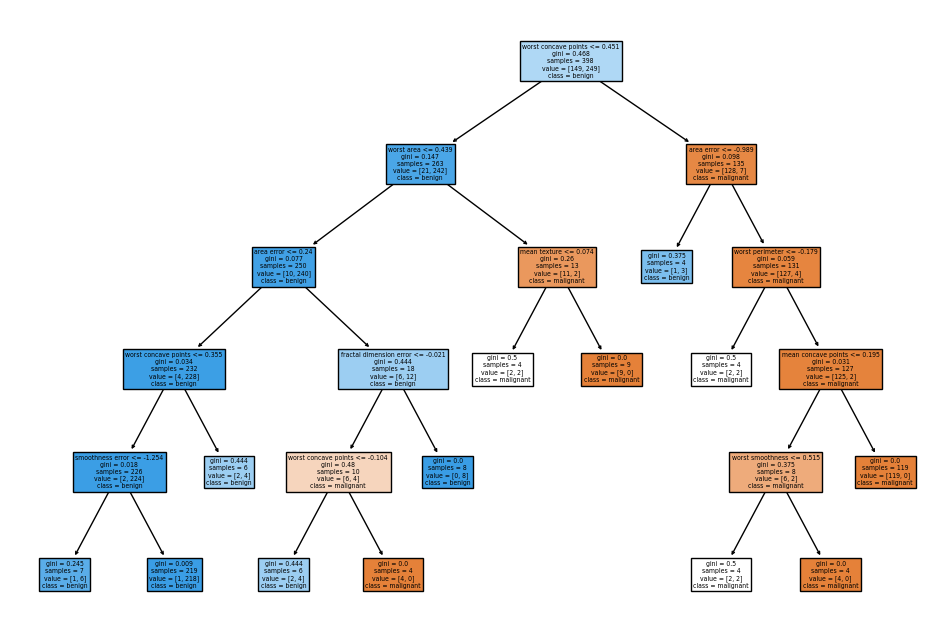

In [204]:
# Visualize the Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt, filled=True, feature_names=load_breast_cancer()['feature_names'], class_names=["malignant", "benign"])
plt.show()

although recall and precision has decreased slightly compared to the initial model, the change is not very significant.
we can therefore keep the original Decision tree as the best fit tree for this dataset.

Now we will apply the K-NN algorithm on the same datase to assess the performance of thaat algorith and see if it is a better model than the Decision Tree.

In [216]:
from sklearn.neighbors import KNeighborsClassifier

In [213]:
# Splitting the data into a training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

In [214]:
# Creating a KNN classifier

knn = KNeighborsClassifier() 

In [215]:
# Performing k-fold cross-validation for each k value between 1-20 to find the optimal value of k

k_accuracy = {}
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, Y, cv=5, scoring='recall')
    k_accuracy[k] = scores.mean()
    
# finding the best value of k --
best_k = max(k_accuracy, key=k_accuracy.get)
print(best_k,':',k_accuracy[best_k])

5 : 0.9943661971830986


In [217]:
# we will run the model with the k value as 5

knn_best = KNeighborsClassifier(n_neighbors=5)

In [218]:
# Fitting the KNN classifier on the training data
knn_best.fit(X_train, Y_train)

# Making predictions on the test data
Y_pred = knn_best.predict(X_test)

In [219]:
# Calculating metrics for the test data

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy*100)
print("Precision:",precision*100)
print("Recall:",recall*100)
print("F1-Score:",f1*100)

# the recall value is very good. 

Accuracy: 96.49122807017544
Precision: 96.36363636363636
Recall: 98.14814814814815
F1-Score: 97.24770642201834


In [220]:
# checking with a 5-fold cross validation -

cv_accuracy = cross_val_score(knn_best, X_scaled, Y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(knn_best, X_scaled, Y, cv=5, scoring='precision')
cv_recall = cross_val_score(knn_best, X_scaled, Y, cv=5, scoring='recall')
cv_f1 = cross_val_score(knn_best, X_scaled, Y, cv=5, scoring='f1')

print("CV_Accuracy:", cv_accuracy.mean()*100)
print("CV_Precision:",cv_precision.mean()*100)
print("CV_Recall:",cv_recall.mean()*100)
print("CV_F1-Score:",cv_f1.mean()*100)

# however, with cross validation, the recall increases slightly but nonetheless, the performance is quite high.

CV_Accuracy: 97.36376339077782
CV_Precision: 96.47857994981281
CV_Recall: 99.43661971830986
CV_F1-Score: 97.93087700476863


The recall score of the KNN approach is higher than that of the Decision tree (with the important features).
KNN seems to be a better fit model in this case

finally, we will check the performance of The Naive Bayes approach

In [221]:
from sklearn.naive_bayes import GaussianNB

In [222]:
# Splitting the data into a training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

In [223]:
# Creating a Naive Bayes classifier (GaussianNB since the features are continuous)

nb = GaussianNB()

In [224]:
# Training the Naive Bayes model on the training data
nb.fit(X_train, Y_train)

# Making predictions on the test data
y_pred = nb.predict(X_test)

In [225]:
# Calculating metrics for the test set

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy*100)
print("Precision:",precision*100)
print("Recall:",recall*100)
print("F1-Score:",f1*100)

# the recall value is slightly lower than the KNN approach

Accuracy: 96.49122807017544
Precision: 96.36363636363636
Recall: 98.14814814814815
F1-Score: 97.24770642201834


In [226]:
# checking with a 5-fold cross validation -

cv_accuracy = cross_val_score(nb, X_scaled, Y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(nb, X_scaled, Y, cv=5, scoring='precision')
cv_recall = cross_val_score(nb, X_scaled, Y, cv=5, scoring='recall')
cv_f1 = cross_val_score(nb, X_scaled, Y, cv=5, scoring='f1')

print("CV_Accuracy:", cv_accuracy.mean()*100)
print("CV_Precision:",cv_precision.mean()*100)
print("CV_Recall:",cv_recall.mean()*100)
print("CV_F1-Score:",cv_f1.mean()*100)

# however, with cross validation, the recall score happens to fall even further.

CV_Accuracy: 94.72907933550691
CV_Precision: 95.0647771901463
CV_Recall: 96.63145539906104
CV_F1-Score: 95.81200932317167


We can conclude that, for performing classification technique on the Breast Cancer Dataset, the best approach would be to either go with a KNN algorithm with the number of nearest neighbors to be 5 or to perform a Naive Bayes algorithm instead of a decision tree.

However, for future considerations, it's worth exploring the performance of ensemble learning algorithms to determine if they outperform the supervised learning algorithms we've examined so far.